In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## first step: Randomly choosing the K centroids for the initial clusters from the dataset.

In [14]:
def kMeans_init_centroids(X, K):
    rand_idx = np.random.permutation(X.shape[0])
    init_centroids = X[rand_idx[:K]]
    return np.array(init_centroids)

## Second step: Assigning each data point to their nearest centroid.

In [15]:
def assigning_points_to_centroids(x,centroids):
    m,n = x.shape
    k = centroids.shape[0]
    index = []
    for i in range(m):
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(x[i]-centroids[j]))
        index.append(np.argmin(distance))
    return np.array(index)

## Third step: Updating centroid locations based on the locations of the data points

In [16]:
def recomputing_centroids(x,index,k):
    n = x.shape[1]
    new_centroids = []
    for j in range(k):
        points_related_to_cluster_j = x[index == j]
        new_centroids.append(np.mean(points_related_to_cluster_j, axis = 0)) 
    return np.array(new_centroids)

## Fourth step: Running the algorithm(repeting [fist & second] step n times )

In [17]:
def run_kMeans(X, initial_centroids, max_iters):
    k = initial_centroids.shape[0]
    z = initial_centroids
    for i in range(max_iters):
        indx = assigning_points_to_centroids(X, z)
        centroids = recomputing_centroids(X,indx,k)
        z = centroids
        if i%5 == 0:
            print('iteration{}/{} ====>{} \n'.format(i,max_iters,list(z)))
    return np.array(centroids),np.array(indx)

## Fifth step: Loading Manipulating and Preprocessing Data

In [25]:
#loading data set
data = pd.read_csv(r"C:\Users\purna\Desktop\Projects\Spotify Songs Clustering based on Audio Features\Data Sets\SpotifyFeatures.csv")

In [26]:
data.head(20)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [28]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [29]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

## Frequency distribution for some features

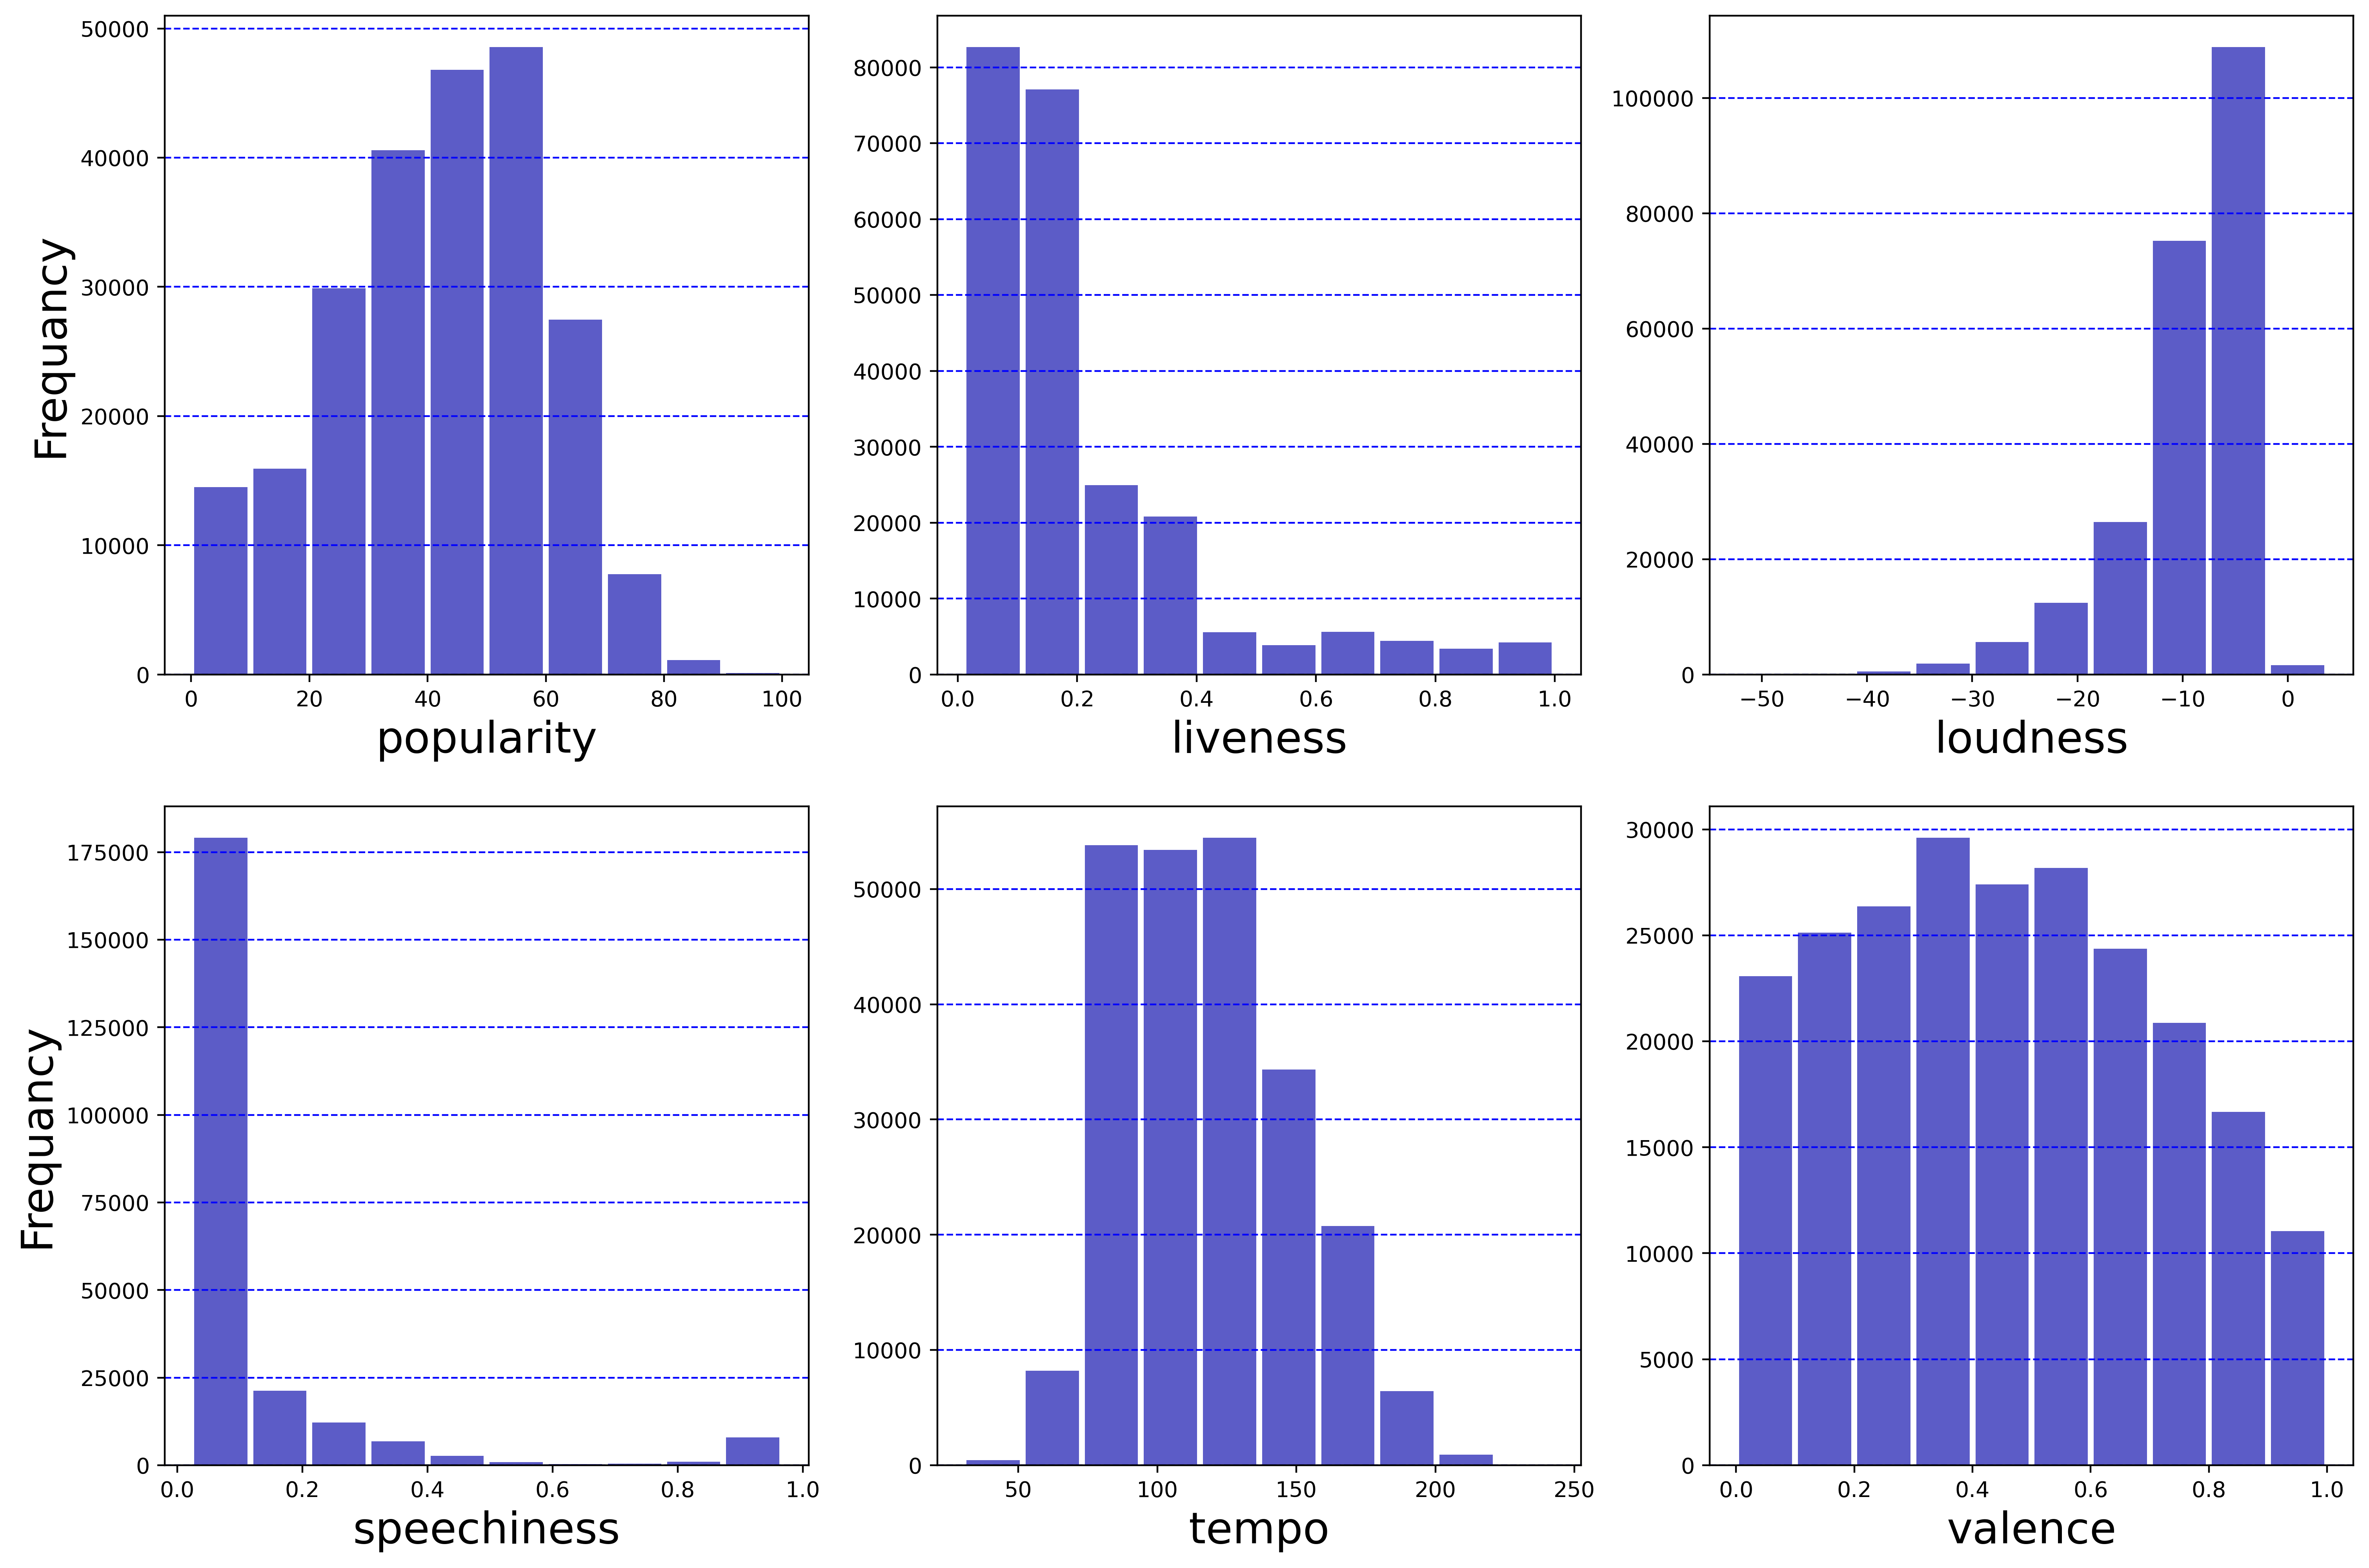

In [30]:
features =  ['popularity', 'liveness', 'loudness','speechiness','tempo', 'valence']
l = len(features)
plt.figure(figsize=(18,12),dpi = 400)
for i in range (l):
    plt.subplot(2,3,i+1)
    plt.hist(data[features[i]],color='#0504aa',alpha = 0.65,rwidth=0.9)
    plt.xlabel(features[i],size = 20)
    if i == 0 or i == 3:
        plt.ylabel("Frequancy",size = 20)
        
    plt.xticks()
    plt.yticks()
    plt.grid(axis = "y" , linestyle = "--",color = "b")

In [31]:
# Grouping data by gener then count track_id in each group
df0 = pd.DataFrame(data.groupby(data["genre"]).count()["track_id"]).reset_index()
#sorting values in
df0 = df0.sort_values(by="track_id",ascending=False)

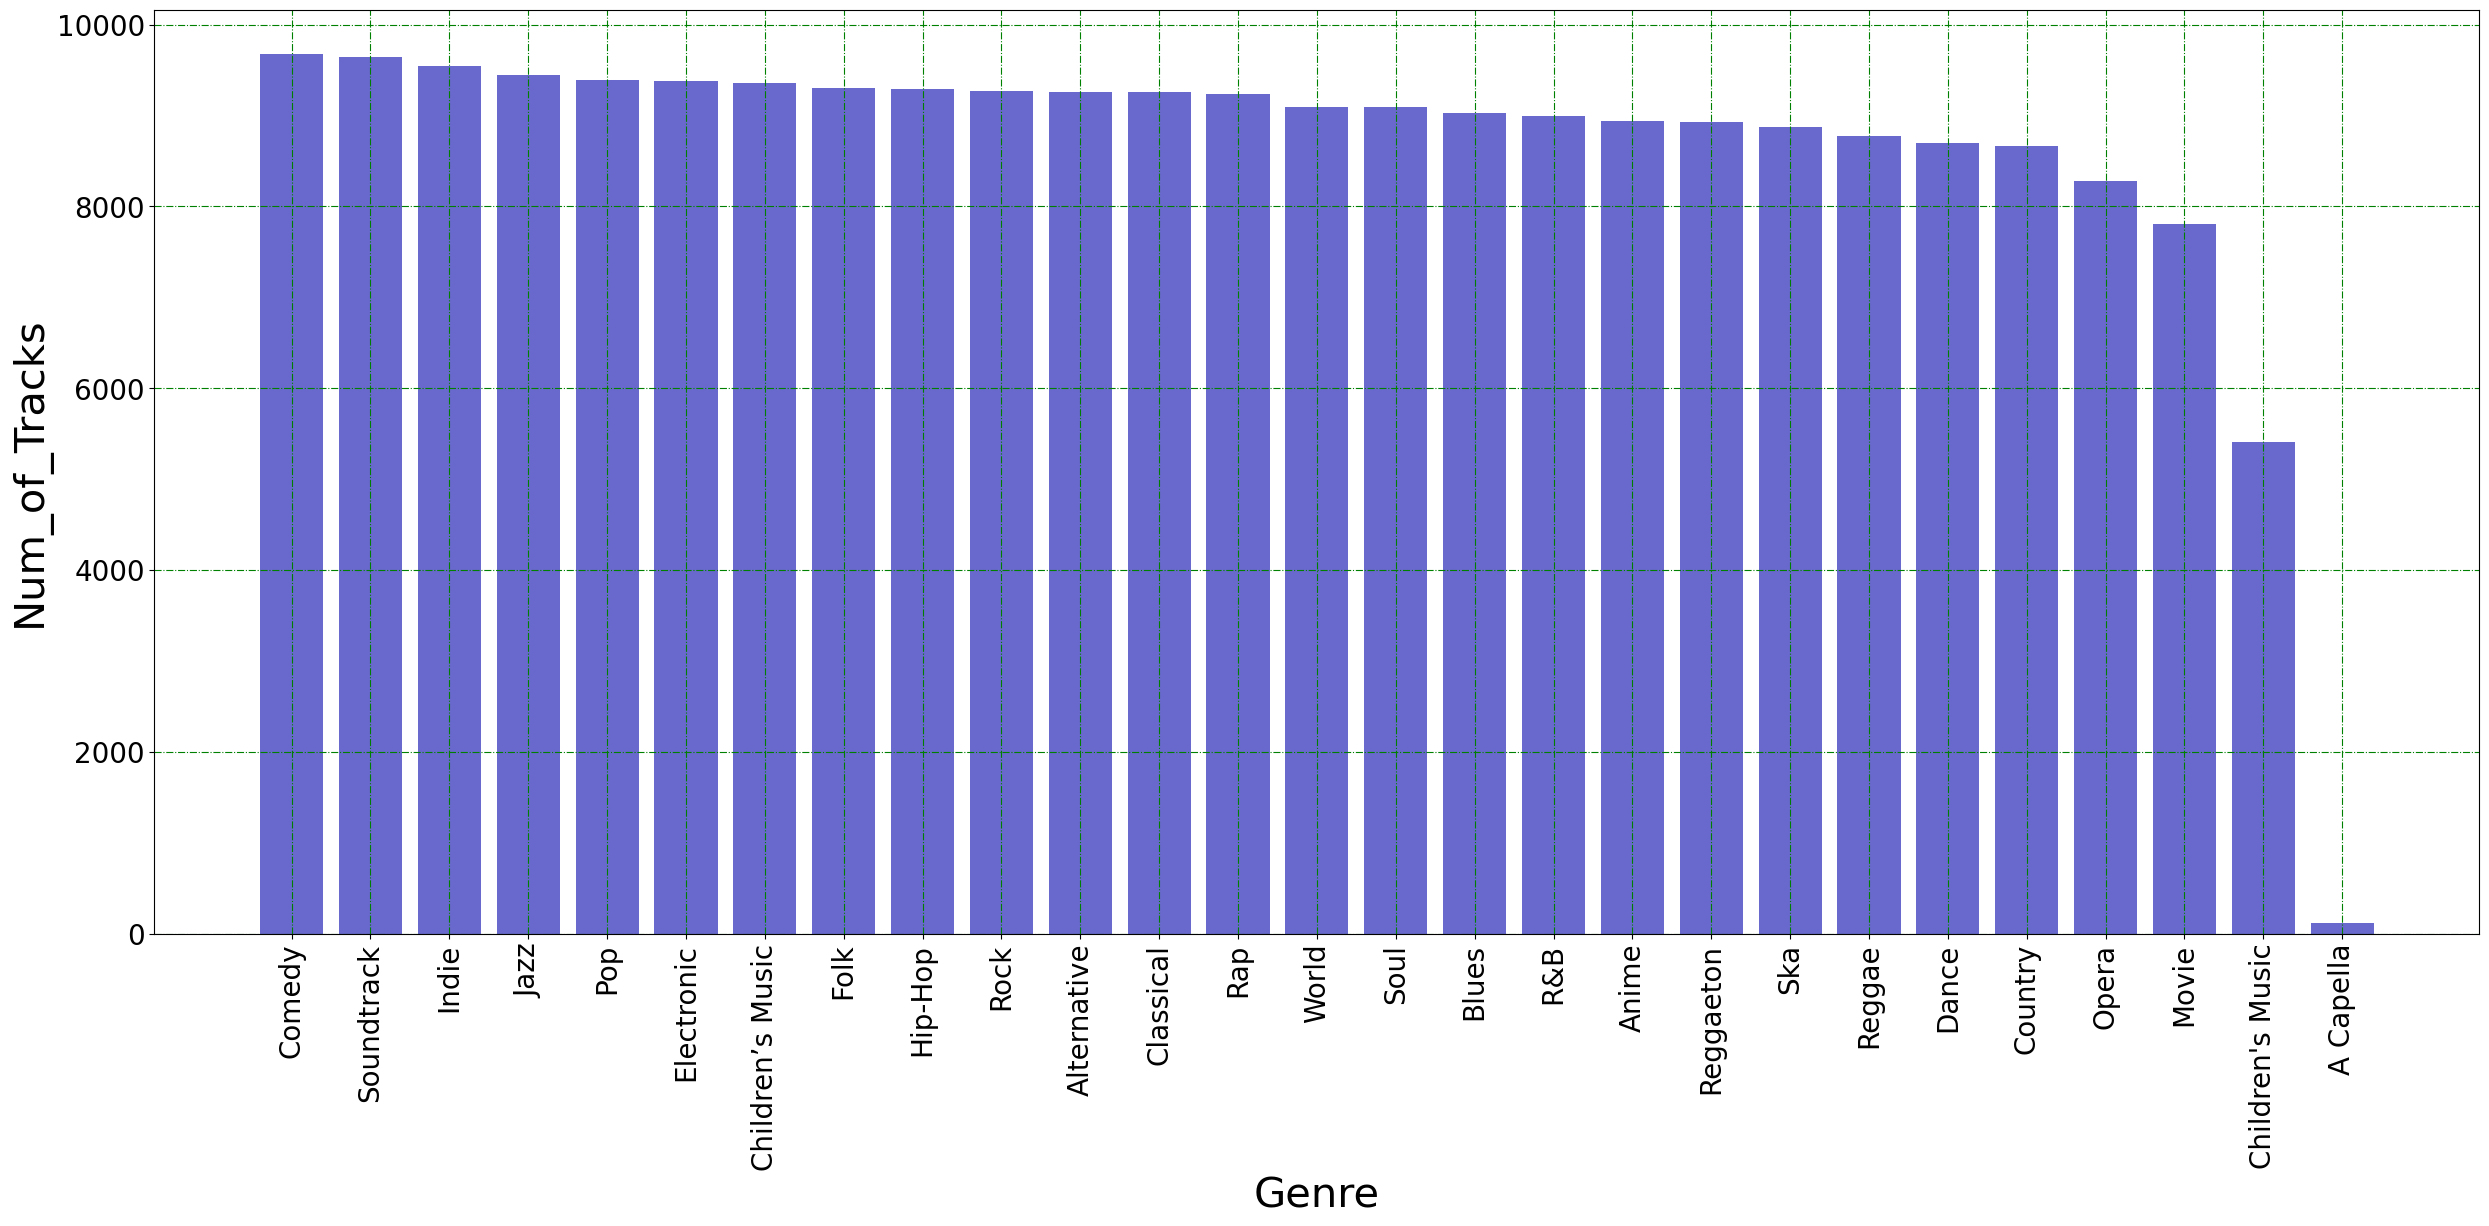

In [32]:
# Plotting no.of tracks in each category
plt.figure(figsize= (30,12))
plt.bar(df0["genre"],df0["track_id"],color = '#0504aa',alpha = 0.6)
plt.xlabel("Genre",size = 30)
plt.ylabel("Num_of_Tracks",size = 30)
plt.xticks(size = 20,rotation='vertical')
plt.yticks(size = 20)
plt.grid(linestyle = '-.',c = "g")
plt.show()

In [33]:
df1 = data.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'key', "time_signature"])
df1

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
0,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,Major,0.0525,166.969,0.814
1,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,Major,0.0395,171.758,0.227
4,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
232720,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,Major,0.0316,115.542,0.962
232721,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,Minor,0.0337,113.830,0.969
232722,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,Major,0.1480,84.135,0.813
232723,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,Major,0.1460,100.031,0.489


In [34]:
#data preprocessing 
df1.loc[df1["mode"] == "Major" ,"mode"] = 1
df1.loc[df1["mode"] == "Minor" ,"mode"] = 0
x = np.array(df1)

In [35]:
#scaling features 
df1["popularity"] = df1["popularity"] / max(df1["popularity"])
df1["duration_ms"] = df1["duration_ms"] /max(df1["duration_ms"])
df1["tempo"] = df1["tempo"] /max(df1["tempo"])
df1["loudness"] = df1["loudness"] /max(df1["loudness"])

## Choosing the proper number of clusters using elbow method

In [36]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


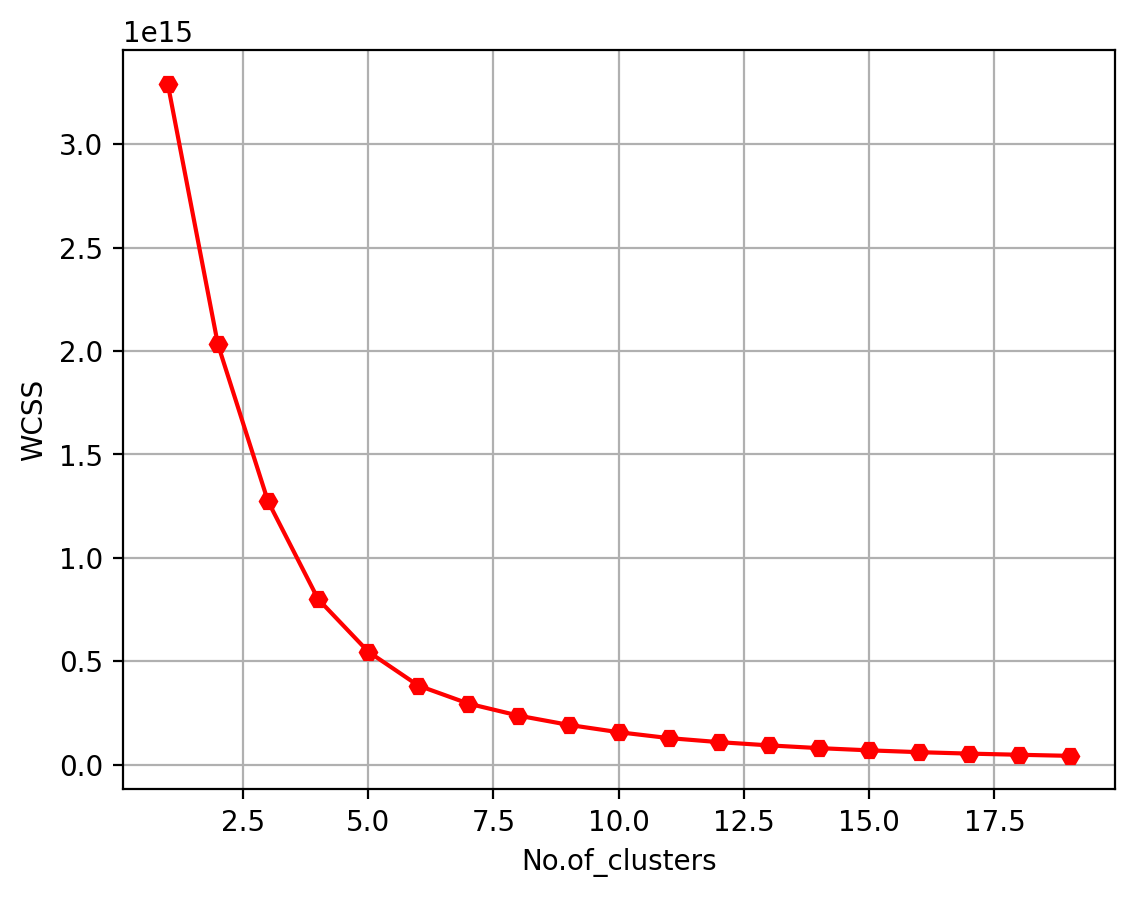

In [49]:
plt.figure(dpi = 200)
plt.plot(np.arange(1,20),wcss,marker = "H",color = "r")
plt.xlabel("No.of_clusters")
plt.ylabel("WCSS")

plt.grid()
plt.show()

In [50]:
initial_centroids = kMeans_init_centroids(x, 10)
print('initial centroids ====>\n{} \n'.format(initial_centroids))

initial centroids ====>
[[51 0.953 0.338 211813 0.202 0.194 0.111 -13.684 1 0.0315 116.703 0.128]
 [46 0.197 0.921 148173 0.38 0.000488 0.0987 -7.235 1 0.0594 105.054
  0.276]
 [62 0.00806 0.49 227533 0.44 0.00103 0.186 -7.76 1 0.353 173.095 0.091]
 [26 0.833 0.298 175215 0.187 0.609 0.323 -16.859 0 0.0288 73.507 0.104]
 [52 0.00263 0.351 208419 0.935 0.0 0.141 -3.518 1 0.236 158.018 0.443]
 [53 0.674 0.566 250013 0.511 3.02e-06 0.221 -8.826 0 0.0614 123.311
  0.258]
 [48 0.000225 0.556 193200 0.9 0.327 0.482 -5.955 1 0.0423 130.384 0.666]
 [50 0.0642 0.437 177867 0.844 1.42e-06 0.124 -3.394 1 0.0381 155.066
  0.493]
 [66 0.763 0.433 165102 0.554 0.0 0.0903 -5.629 0 0.165 140.235 0.546]
 [28 0.0371 0.292 523613 0.536 0.0003 0.411 -8.935 1 0.0356 141.994
  0.0669]] 



## Running the Algorithm

after running the algoritm we will get the final centroides and an index for each example in input dataset which refers to the cluster to which this example belong.

In [52]:
centroids,idx = run_kMeans(x, initial_centroids,21)

iteration0/21 ====>[array([46.674460655942134, 0.277710420195785, 0.5937492891881767,
       214931.37498441202, 0.6322693920688347, 0.0790706522509044,
       0.19544422621274585, -7.787133495448345, 0.6442199775533108,
       0.10197003990522555, 119.2356649831652, 0.4914230764434491],
      dtype=object), array([29.29491627696485, 0.5744176421882601, 0.5210519867249965,
       115690.48502036506, 0.45329652187659947, 0.26178632629023957,
       0.24981438950067744, -13.046417559209452, 0.6935887765877207,
       0.18178554533111524, 113.82912876753505, 0.4582278020817609],
      dtype=object), array([45.687877012167796, 0.2760084310116852, 0.5835003722725812,
       228998.7180724553, 0.6317421557340271, 0.08636657410533898,
       0.1988079728378886, -7.9092151597670695, 0.6321050635965668,
       0.1024159525697158, 120.00484950536053, 0.477785312467685],
      dtype=object), array([42.151416122004356, 0.378796757648614, 0.5798540149393097,
       173423.849361967, 0.5736247774665

In [53]:
print(idx.shape)
idx[30:100]

(232725,)


array([6, 1, 8, 7, 4, 7, 6, 6, 8, 1, 7, 6, 3, 8, 2, 1, 7, 0, 7, 6, 8, 1,
       1, 6, 8, 1, 6, 3, 1, 2, 3, 7, 3, 7, 0, 4, 6, 8, 3, 6, 1, 8, 3, 1,
       2, 4, 8, 7, 5, 6, 6, 1, 0, 6, 3, 1, 4, 2, 4, 0, 4, 0, 3, 3, 3, 4,
       9, 3, 1, 3], dtype=int64)

## Creating playlists based on output indexes generated by K_Mean Algorithm

In [54]:
Cluster_No_i = []
for i in range(10):
    x = pd.DataFrame(data.iloc[idx == i ] )
    y = x.drop(columns=['popularity','acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness',
                       'liveness', 'loudness','speechiness', 'tempo', 'valence'])
    Cluster_No_i.append(y)

## Generated playlists

In [62]:
# Playlist no.1
Cluster_No_i[0]

,genre,artist_name,track_name,track_id,key,mode,time_signature
13,Movie,Chorus,Mangala Aarti,0jIY0oRAp1T4mezDyEhOad,D#,Major,3/4
25,Movie,Jean Piat,Comme minuit sonnait,16UTNMhXjeJa8IG9uBijxZ,A#,Minor,5/4
47,Movie,Debbie Davis,I'll Feel Much Better When You Cry,23YuvN1cvAocACyKpYqzvu,E,Major,3/4
64,Movie,Chorus,Nadipinche Naa Naayaka,2WsyzikcaMllNx3HCbHnl1,G,Minor,4/4
82,Movie,Jean Claude Corbel,Le Petit Poucet 2,2uou9Wr6a3HxmieA8NafPc,F,Minor,3/4
...,...,...,...,...,...,...,...
232714,Soul,H-Town,They Like It Slow,2XoAEpBuM4AtQIQYUEowRy,C#,Major,4/4
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,E,Major,4/4
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,D,Major,4/4
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,E,Minor,4/4


In [63]:
# Playlist no.2
Cluster_No_i[1]

,genre,artist_name,track_name,track_id,key,mode,time_signature
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,F,Major,4/4
23,Movie,Jean Claude Corbel,Pourquoi aller plus loin ?,15CpJP0LXchBUjpB8RKh8m,C,Major,4/4
31,Movie,Martin & les fées,Une journée d'école qui s'achève (par Véroniqu...,1LFky4DBeOLzVWbg0avgod,B,Minor,4/4
39,Movie,Larry Groce,"Sailing, Sailing",1jyknwZYTEEj1TCUozUbCi,G,Major,4/4
45,Movie,Ken Page,Penn Station - Seesaw,1qda3iYG5DlQJeY5BpSmpe,C,Major,4/4
...,...,...,...,...,...,...,...
231938,Soul,The Roots,No John Trumbull - Intro,2XxeRadxMDJQX8R9wOKR61,F,Major,4/4
232047,Soul,Jorja Smith,Carry Me Home (Interlude),6lMMzrM5BOVSlJ1DbnzWjr,B,Minor,3/4
232157,Soul,Quentin Miller,"""Proper Freestyle"".",5okpwK0iFJ2rh92GkFNj77,D,Minor,4/4
232355,Soul,Erykah Badu,Hi,5GsT7Z8h4PL3TPtWm3Maki,F#,Minor,3/4


In [64]:
# Playlist no.5
Cluster_No_i[4]

,genre,artist_name,track_name,track_id,key,mode,time_signature
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,F#,Major,4/4
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,C,Major,4/4
34,Movie,Chorus,Ambarsare Diyan Warhiyan,1Zj5XBiUaHTkkBJ2nET477,E,Minor,4/4
65,Movie,Karine Costa,Super Insomniaque,2WwJlG8fczrLwRAxsnXRl7,B,Minor,4/4
75,Movie,Jean Claude Corbel,Les poissons voyageurs,2jBp52nfXVpHbt9dqf0cSs,G,Major,4/4
...,...,...,...,...,...,...,...
232707,Soul,Tamar Braxton,How I Feel,5yEquyU4vMyFe4KDJdj5tn,F#,Major,4/4
232709,Soul,Joss Stone,Some Kind Of Wonderful,1sQMwuozNCmF811OgjTWIA,C,Major,4/4
232711,Soul,The Knocks,Comfortable (feat. X Ambassadors),6KkLg2UJB4sUIbtDyc8Esu,A#,Minor,4/4
232712,Soul,Great Good Fine Ok,You're The One For Me,3UzHyDmqpBJR2J65h0702t,C,Minor,4/4


In [65]:
# Playlist no.9
Cluster_No_i[8]

,genre,artist_name,track_name,track_id,key,mode,time_signature
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,C#,Major,4/4
11,Movie,Randy Newman,The Hanging (Maverick - Original Motion Pictur...,0hprxsuRM5vVCOfaM7l3gQ,C,Major,4/4
32,Movie,Henri Salvador,C Est Le Be Bop,1R8nFU8no9yINDiCzBcgB3,C,Minor,4/4
38,Movie,Richard M. Sherman,Afterglow,1j6b29LbEnEqbn8aswj4p1,D#,Major,3/4
43,Movie,Patrick Rocca,To Be or Not to Be,1q7DDr7riLHgrqAMxyZNFC,A,Minor,4/4
...,...,...,...,...,...,...,...
232498,Soul,Shirley Ann Lee,Someday,1CA90cZ19qHb7cFCrHbRl2,D#,Major,5/4
232583,Soul,SALES,Mondays,225LE8caOGYWI5bglp9OIb,B,Minor,4/4
232602,Soul,Jazz Cartier,• WHICH ONE,0kPP4qqlYVIOGtGEv4j7li,F#,Major,4/4
232605,Soul,Men I Trust,Sad Organ,4z8WheUV9mwdaNWD8eFWwg,F#,Minor,4/4


In [66]:
# Playlist no.10
Cluster_No_i[9]

,genre,artist_name,track_name,track_id,key,mode,time_signature
15,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 6,0uWUjxM7oDPKpb3T2y3oZm,G#,Major,3/4
96,Movie,Chorus,Koti Chennaya(Vol.1 &amp; 2),3NXlNZSmjO3DsJ3DQuyU8e,F,Major,4/4
114,Movie,Michel Roux,Les aventures d'Arsène Lupin: 813 - Partie 5,3kQkcxkRneREJohv69y6hD,F,Minor,3/4
369,Movie,Michel Roux,L'aiguille creuse - Partie 1,06UFQjrvxqQe6EkHxcu9BX,G#,Major,3/4
450,Movie,Chorus,Sri Sankashta Chathurthi Vratha,3ZsulgbSF46mgpmuZtSixp,D,Major,4/4
...,...,...,...,...,...,...,...
219057,World,Jamie Llewellyn,Nature Sounds for Sleep: Crackling Log Fire wi...,40duG6erWyOVizxE9P8KqV,B,Minor,1/4
220830,World,Steve Reich,Music for 18 Musicians,2hmdWr3UjU3aXS4KjhQgex,F#,Minor,3/4
221109,World,Brian Eno,I Dormienti,0bZpZXnlkmBCJGh9EhEVAX,C#,Major,4/4
221555,World,Pharoah Sanders,The Creator Has A Master Plan,0VtW9kU97Le5SQ0ml4nFzO,D#,Major,4/4
